## HW 2. 
Введение в подготовку данных для аналитиков. Таблицы фактов и таблицы измерений.

***Задание 1.***  Скачайте датасет fifаs2.сsv. Проанализируйте его и определите, какие данные являются неполными. Удалите
ненужные колонки и недостающие значения.


In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:\GB\DataEngineer\ETL\HW\2\fifa_s2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2399 non-null   int64  
 1   Name                      2399 non-null   object 
 2   Age                       2399 non-null   int64  
 3   Nationality               2392 non-null   object 
 4   Overall                   2399 non-null   int64  
 5   Potential                 2399 non-null   int64  
 6   Club                      2158 non-null   object 
 7   Value                     2142 non-null   float64
 8   Wage                      2399 non-null   int64  
 9   Preferred Foot            2399 non-null   object 
 10  International Reputation  2389 non-null   float64
 11  Skill Moves               2393 non-null   float64
 12  Position                  2378 non-null   object 
 13  Joined                    2399 non-null   int64  
 14  Contract

In [298]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
1,5479,Casillas,37,Spain,82,82,FC Porto,1500.0,10,Left,4.0,1.0,NaN,2015,01/01/2019,6.083333,185.0,3000.0
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0


In [299]:
#посмотрим процент пропущенных данных по столбцам и тепловую карту пропусков
df.isna().sum()/len(df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.291788
Overall                      0.000000
Potential                    0.000000
Club                        10.045852
Value                       10.712797
Wage                         0.000000
Preferred Foot               0.000000
International Reputation     0.416840
Skill Moves                  0.250104
Position                     0.875365
Joined                       0.000000
Contract Valid Until        11.379742
Height                       0.000000
Weight                       0.000000
Release Clause               0.125052
dtype: float64

<Axes: >

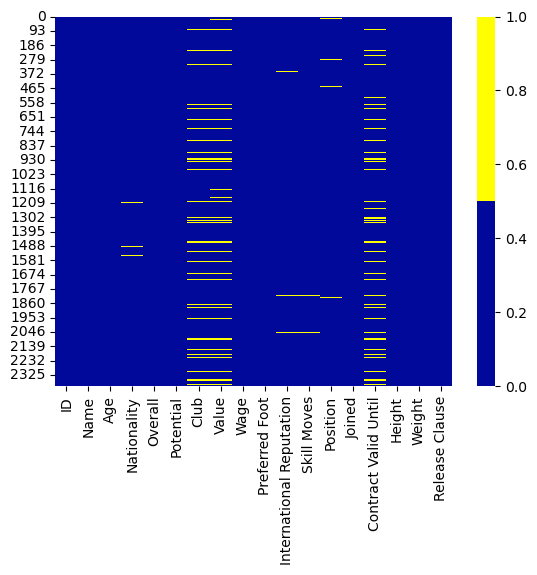

In [300]:
colors = ['#000999', '#ffff00']
sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette(colors))

Видим что пропусков немного, удалять столбцы изза большого количества пропусков не будем. Так же из тепловой карты видим, что строк с большим количеством пропусков нет, их тоже удалять не будем. Еще видим, что пропуски Club и Value имеют место для одинаковых игроков. В чем причина - предположить не могу (не разбираюсь в футболе). В колонке Club заполнить пропуски можем только статусом неизвестно, а вот в колонке  Value уберем пропуски. Предположим, что Value коррелирует с категориальным атрибутом International Reputation. Проверим это.

In [301]:
df.groupby('International Reputation')[ 'Value'].mean()

International Reputation
1.0     2063.523610
2.0    12202.000000
3.0    26863.829787
4.0    42565.116279
5.0    84800.000000
Name: Value, dtype: float64

In [302]:
df[(df['International Reputation'].isna())&(df['Value'].isna())].value_counts()

Series([], dtype: int64)

как можно увидеть, International Reputation имеет всего 5 категорий, и чем выше International Reputation, тем выше Value. Строк, в котором пропущены одновременно International Reputation и Value нет, сооветвенно заменим пропуски в Value медианой этого значения в каждой категории International Reputation. Остальные пропуски заменим на indefined. Поменяем тип данных у International Reputation на категориальный.

In [303]:
for i in df['International Reputation'].unique():
    df[df['International Reputation']==i].Value = df.Value.fillna(df[df['International Reputation']==i].Value.median(), inplace=True)

C:\Users\Olesya\AppData\Local\Temp\ipykernel_1712\3837429199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['International Reputation']==i].Value = df.Value.fillna(df[df['International Reputation']==i].Value.median(), inplace=True)


In [304]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col] = df[col].fillna('indefined')

df['International Reputation']=df['International Reputation'].astype('category')

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        2399 non-null   int64   
 1   Name                      2399 non-null   object  
 2   Age                       2399 non-null   int64   
 3   Nationality               2399 non-null   object  
 4   Overall                   2399 non-null   int64   
 5   Potential                 2399 non-null   int64   
 6   Club                      2399 non-null   object  
 7   Value                     2399 non-null   float64 
 8   Wage                      2399 non-null   int64   
 9   Preferred Foot            2399 non-null   object  
 10  International Reputation  2389 non-null   category
 11  Skill Moves               2393 non-null   float64 
 12  Position                  2399 non-null   object  
 13  Joined                    2399 non-null   int64 

Какие колонки можно удалить не представляю. Все данные достаточно полные, дублирований нет. Колонки Overall и Potential очень близки, но полностью друг друга не повторяют. 

In [306]:
df[df.Overall==df.Potential].shape[0]/len(df)

0.34305960817007086

Видим, что повторы всего в 34%, убирать какую то из этих двух колонок не вижу необходимости. 

Посмотрим выбросы по колонкам Value и Wage. По боксплоту видим, что распределение имеет большой хвост справа. Значения Value и Wage у нас сильно зависят от категории International Reputation. Посмотрим межквартильние расстояние и максимально значимое значение для максимальной 5 категории.

<Axes: >

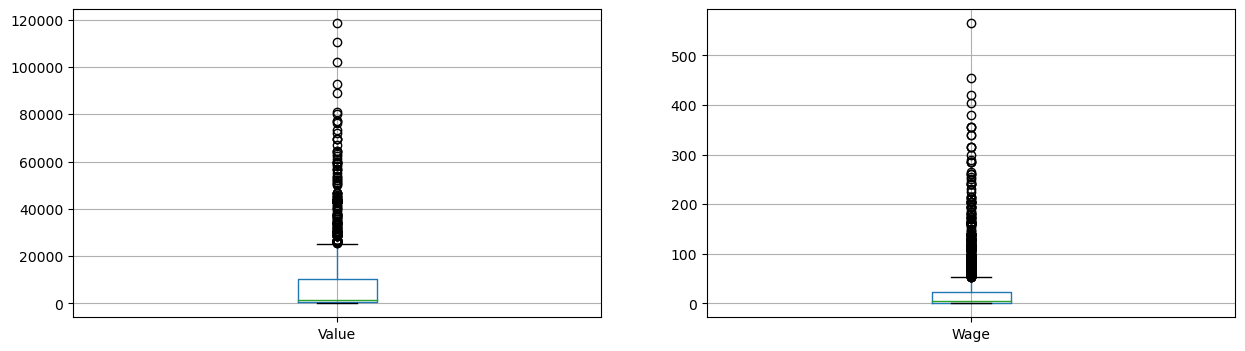

In [307]:
fig, (ax_boxplot, bx_boxplot) = plt.subplots(1, 2, figsize=(15,4))
df.boxplot(column=['Value'], ax=ax_boxplot)
df.boxplot(column=['Wage'])

In [308]:
IQR=df[df['International Reputation']==5].Value.quantile(0.75)-df[df['International Reputation']==5].Value.quantile(0.25)
print(f'Межквартильное расстояние Value для 5 категории International Reputation равно {IQR}.')
MAX=df[df['International Reputation']==5].Value.quantile(0.75)+1.5*IQR
print(f'Максимально значимая величина Value для 5 категории International Reputation равно {MAX}.')
IQR=df[df['International Reputation']==5].Wage.quantile(0.75)-df[df['International Reputation']==5].Wage.quantile(0.25)
print(f'Межквартильное расстояние Wage для 5 категории International Reputation равно {IQR}.')
MAX=df[df['International Reputation']==5].Wage.quantile(0.75)+1.5*IQR
print(f'Максимально значимая величина Wage для 5 категории International Reputation равно {MAX}.')

Межквартильное расстояние Value для 5 категории International Reputation равно 33500.0.
Максимально значимая величина Value для 5 категории International Reputation равно 160750.0.
Межквартильное расстояние Wage для 5 категории International Reputation равно 165.0.
Максимально значимая величина Wage для 5 категории International Reputation равно 702.5.


In [310]:
IQR=df.Value.quantile(0.75)-df.Value.quantile(0.25)
print(f'Межквартильное расстояние Value равно {IQR}.')
MAX=df.Value.quantile(0.75)+1.5*IQR
print(f'Максимально значимая величина Value равно {MAX}.')
IQR=df.Wage.quantile(0.75)-df.Wage.quantile(0.25)
print(f'Межквартильное расстояние Wage равно {IQR}.')
MAX=df.Wage.quantile(0.75)+1.5*IQR
print(f'Максимально значимая величина Wage равно {MAX}.')

Межквартильное расстояние Value равно 9950.0.
Максимально значимая величина Value равно 25425.0.
Межквартильное расстояние Wage равно 21.0.
Максимально значимая величина Wage равно 53.5.


Видим, что если рассматривать значения обеих колонок для всего набора данных, то выбросы есть значительные, но если анализировать по категориям, то для 5 категории выбросов нет. Я считаю, так как разника по категориям значительная, пока удалять выбросы не буду.

***Задание 2.*** Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

In [311]:
#количество полных дубликатов
df.duplicated().sum()

0

Пока их нет, возможно это связано с регистром. Переведем все колонки с типом данных object в нижний регистр и сравним до и после. Выведем на печать если есть разница в количествах.

In [312]:
for col in df.columns:
    if df[col].dtype=='object':
        if df[col].unique().shape!=df[col].str.lower().unique().shape:
            print(f'{col}: в оригинале - {df[col].unique().shape}, в нижнем регистре {df[col].str.lower().unique().shape}')

Club: в оригинале - (82,), в нижнем регистре (81,)


In [313]:
#переведем колонку Club в нижний регистр, и еще раз проверим дубликаты
df.Club = df.Club.str.lower()
print(f'Количество пар дубликатов {df.duplicated().sum()}')
df[df.duplicated()]

Количество пар дубликатов 2


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
154,168651,I. Rakitić,30,Croatia,87,87,fc barcelona,46500.0,260,Right,4.0,3.0,RCM,2014,01/01/2021,6.000000,172.0,95300.0
304,181872,A. Vidal,31,Chile,85,85,fc barcelona,26000.0,205,Right,4.0,3.0,CAM,2018,01/01/2021,5.916667,165.0,53300.0


In [314]:
#Нашли две пары дубликатов, удалим их
df=df.drop_duplicates(keep='first')
df.shape

(2397, 18)

***Задание 3.*** Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до
36 и старше 36. Посчитайте количество футболистов в каждой категории.

In [318]:
def categorize_age(Age):
    if Age<20:
        return 'before 20 years'
    if 20<Age<30:
        return '20-30 years'
    if 30<Age<36:
        return '30-36 years'
    if Age>36:
        return 'after 36 years'
df['Age_category']=df.Age.apply(categorize_age)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Age_category
0,1179,G. Buffon,40,Italy,88,88,paris saint-germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0,after 36 years
1,5479,Casillas,37,Spain,82,82,fc porto,1500.0,10,Left,4.0,1.0,indefined,2015,01/01/2019,6.083333,185.0,3000.0,after 36 years
2,8205,Braga,35,Portugal,70,70,cd aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0,30-36 years
3,9014,A. Robben,34,Netherlands,84,84,fc bayern münchen,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0,30-36 years
4,19521,J. Ibehre,35,England,61,61,cambridge united,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0,30-36 years
